In [35]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score, f1_score,roc_auc_score, roc_curve

In [36]:
def xgboost(train, label_train, test, label_test, evaluate = 't', search = 'g'):
    import xgboost as xgb
    xgb_params = {'max_depth': [2,3], 
              'learning_rate': [x/10 for x in list(range(1,7))],
              'n_estimators': [0, 25, 50],
              'objective': ['binary:logistic']}
    xgb_model = xgb.XGBClassifier(gamma=1, random_state=42, reg_lambda=200, use_label_encoder=False, eval_metric = 'logloss')
    if search == 'g':
        xgb_model = GridSearchCV(xgb_model, xgb_params, scoring='roc_auc')
        xgb_model.fit(train, label_train)
        print(xgb_model.best_estimator_)
    else:
        xgb_model = RandomizedSearchCV(xgb_model, xgb_params)
        xgb_model.fit(train, label_train)
        print(xgb_model.best_params_)
        print(xgb_model.best_score_)
        
    if evaluate == 't':
        evaluate_model(xgb_model, train, label_train)
    else:
        evaluate_model(xgb_model, test, label_test)
    

In [37]:
def randomforest(train, label_train, test, label_test, evaluate = 't', search = 'g'):
    rfc_params = {'n_estimators': [100, 150, 200],
                'max_features': ['auto', 'sqrt', 'log2'],
                'max_depth' : [3,4,5,6],
                'criterion' :['gini', 'entropy'],
                'random_state': [42]}

    rfc_model = RandomForestClassifier()

    if search == 'g':
        rfc_model = GridSearchCV(rfc_model, rfc_params, scoring='roc_auc')
        rfc_model = rfc_model.fit(train, label_train)
        print(rfc_model.best_estimator_)
    else:
        rfc_model = RandomizedSearchCV(rfc_model, rfc_params)
        rfc_model = rfc_model.fit(train, label_train)
        print(rfc_model.best_params_)
        print(rfc_model.best_score_)

    if evaluate == 't':
        evaluate_model(rfc_model, train, label_train)
    else:
        evaluate_model(rfc_model, test, label_test)

In [38]:
def decisiontree (train, label_train, test, label_test, evaluate = 't', search = 'g'):
    dt_params = {"criterion":['gini','entropy'],
                 'max_depth':[3,4,5,6,7,8],
                 'random_state': [42]}

    dt_model = DecisionTreeClassifier()
    if search == 'g':
        dt_model = GridSearchCV(dt_model, dt_params, scoring='roc_auc')
        dt_model.fit(train, label_train)
        print(dt_model.best_estimator_)
    else:
        dt_model = RandomizedSearchCV(dt_model, dt_params)
        dt_model = dt_model.fit(train, label_train)
        print(dt_model.best_params_)
        print(dt_model.best_score_)
    
    if evaluate == 't':
        evaluate_model(dt_model, train, label_train)
    else:
        evaluate_model(dt_model, test, label_test)

In [39]:
def evaluate_model(model, test, label_test):
    predicted = model.predict(test)
    print("accuracy:", str(accuracy_score(label_test, predicted)))
    
    print("precision:", str(precision_score(label_test, predicted, average='weighted')))

    print("recall:", str(recall_score(label_test, predicted, average='weighted')))
   
    print("f1", str(f1_score(label_test, predicted, average='weighted')))
    
    print("metrics.roc_auc_score", str(roc_auc_score(label_test, predicted, average='weighted')))

    plot_confusion_matrix(model, test, label_test,
                      display_labels=list(set(label_test)),
                      cmap=plt.cm.Blues)
    
    classification = classification_report(label_test, predicted)
    print(classification)

In [40]:
train = pd.read_csv('../data_preprocess_v2/train_df_day_5_1.csv')
test = pd.read_csv('../data_preprocess_v2/test_df_day_5_1.csv')

In [41]:
train.head()

,Volume (t-5),Volume (t-4),Volume (t-3),Volume (t-2),Volume (t-1),Close (t-5),Close (t-4),Close (t-3),Close (t-2),Close (t-1),Close (t),movement
0,23220030,18022532.0,42498199.0,37125801.0,57822062.0,0.42388,0.42134,0.42902,0.41618,0.43927,0.44566,1
1,18022532,42498199.0,37125801.0,57822062.0,68847968.0,0.42134,0.42902,0.41618,0.43927,0.44566,0.45718,1
2,42498199,37125801.0,57822062.0,68847968.0,53755262.0,0.42902,0.41618,0.43927,0.44566,0.45718,0.44052,0
3,37125801,57822062.0,68847968.0,53755262.0,27136886.0,0.41618,0.43927,0.44566,0.45718,0.44052,0.43157,0
4,57822062,68847968.0,53755262.0,27136886.0,29641922.0,0.43927,0.44566,0.45718,0.44052,0.43157,0.43286,1


In [42]:
label_train = train["movement"].astype(int)
train = train.drop(["Close (t)","movement"],1)
label_test = test["movement"].astype(int)
test = test.drop(["Close (t)","movement"],1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=25, n_jobs=8,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=200,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)
accuracy: 0.5493861607142857
precision: 0.5738343181839503
recall: 0.5493861607142857
f1 0.4417022436444091
metrics.roc_auc_score 0.5190127145748811
              precision    recall  f1-score   support

           0       0.55      0.95      0.69      1918
           1       0.61      0.09      0.15      1666

    accuracy                           0.55      

C:\Users\sr_te\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sr_te\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sr_te\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sr_te\anaconda3\lib\site-packages\sklearn\metrics\_classifi

{'objective': 'binary:logistic', 'n_estimators': 0, 'max_depth': 3, 'learning_rate': 0.2}
0.535156183040758
accuracy: 0.5045572916666666
precision: 0.25457806057400173
recall: 0.5045572916666666
f1 0.3384092609620655
metrics.roc_auc_score 0.5
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       775
           1       0.00      0.00      0.00       761

    accuracy                           0.50      1536
   macro avg       0.25      0.50      0.34      1536
weighted avg       0.25      0.50      0.34      1536



C:\Users\sr_te\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sr_te\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sr_te\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sr_te\anaconda3\lib\site-packages\sklearn\metrics\_classifi

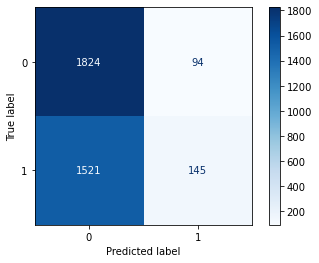

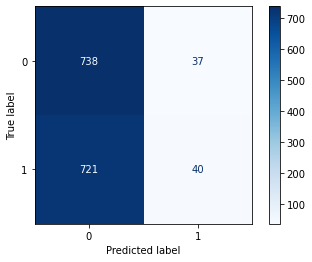

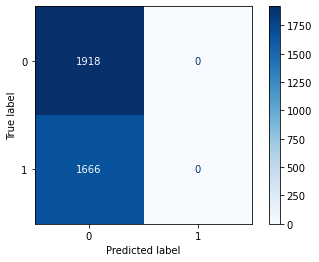

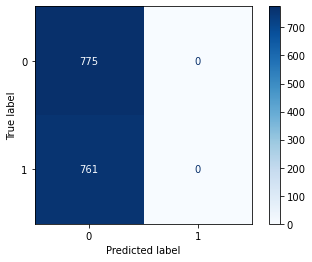

In [43]:
xgb_g_train = xgboost(train, label_train, test, label_test)
xgb_g_test = xgboost(train, label_train, test, label_test,  evaluate = 's')
xgb_r_train = xgboost(train, label_train, test, label_test, search = 'r')
xgb_r_test = xgboost(train, label_train, test, label_test, evaluate = 's', search = 'r')

RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=150,
                       random_state=42)
accuracy: 0.55078125
precision: 0.6784947916666668
recall: 0.55078125
f1 0.4133179909560724
metrics.roc_auc_score 0.5173587683248482
              precision    recall  f1-score   support

           0       0.54      0.99      0.70      1918
           1       0.83      0.04      0.08      1666

    accuracy                           0.55      3584
   macro avg       0.69      0.52      0.39      3584
weighted avg       0.68      0.55      0.41      3584

RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=150,
                       random_state=42)
accuracy: 0.4993489583333333
precision: 0.47100287795042267
recall: 0.4993489583333333
f1 0.3664736427528504
metrics.roc_auc_score 0.49518290873638254
              precision    recall  f1-score   support

           0       0.50      0.95      0.66       775
           1       0.44      0.04      0.07       

KeyboardInterrupt: 

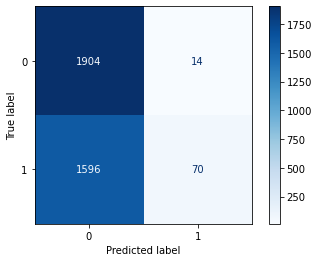

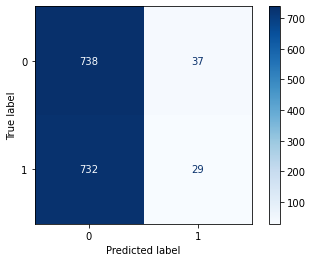

In [44]:
rfc_g_train = randomforest(train, label_train, test, label_test, )
rfc_g_test = randomforest(train, label_train, test, label_test,  evaluate = 's')
rfc_r_train = randomforest(train, label_train, test, label_test,  search = 'r')
rfc_r_test = randomforest(train, label_train, test, label_test,  evaluate = 's', search = 'r')

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
accuracy: 0.5382254464285714
precision: 0.6220388890840124
recall: 0.5382254464285714
f1 0.38334277042175297
metrics.roc_auc_score 0.5035773433460975
              precision    recall  f1-score   support

           0       0.54      1.00      0.70      1918
           1       0.72      0.01      0.02      1666

    accuracy                           0.54      3584
   macro avg       0.63      0.50      0.36      3584
weighted avg       0.62      0.54      0.38      3584

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
accuracy: 0.5045572916666666
precision: 0.25457806057400173
recall: 0.5045572916666666
f1 0.3384092609620655
metrics.roc_auc_score 0.5
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       775
           1       0.00      0.00      0.00       761

    accuracy                           0.50      1536
   macro avg       0.2

C:\Users\sr_te\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sr_te\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sr_te\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sr_te\anaconda3\lib\site-packages\sklearn\metrics\_classifi

{'random_state': 42, 'max_depth': 3, 'criterion': 'entropy'}
0.5334825428733939
accuracy: 0.5382254464285714
precision: 0.6220388890840124
recall: 0.5382254464285714
f1 0.38334277042175297
metrics.roc_auc_score 0.5035773433460975
              precision    recall  f1-score   support

           0       0.54      1.00      0.70      1918
           1       0.72      0.01      0.02      1666

    accuracy                           0.54      3584
   macro avg       0.63      0.50      0.36      3584
weighted avg       0.62      0.54      0.38      3584

{'random_state': 42, 'max_depth': 5, 'criterion': 'gini'}
0.5332024341023663
accuracy: 0.4993489583333333
precision: 0.45382814741107286
recall: 0.4993489583333333
f1 0.35453249136231824
metrics.roc_auc_score 0.49504048153957014
              precision    recall  f1-score   support

           0       0.50      0.97      0.66       775
           1       0.40      0.02      0.04       761

    accuracy                           0.50      1

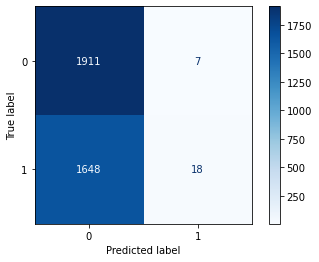

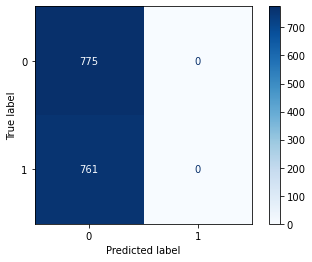

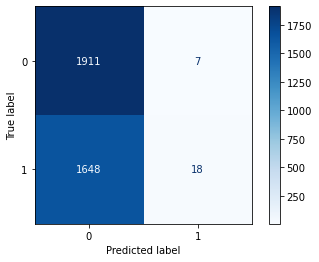

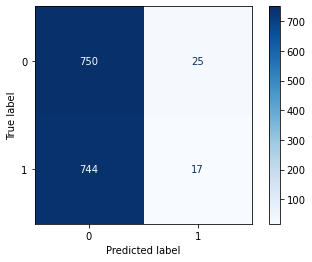

In [45]:
dt_g_train = decisiontree(train, label_train, test, label_test)
dt_g_test = decisiontree(train, label_train, test, label_test, evaluate = 's')
dt_r_train = decisiontree(train, label_train, test, label_test, search = 'r')
dt_r_test = decisiontree(train, label_train, test, label_test, evaluate = 's', search = 'r')